In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/content/sample_data/Churn_Modelling_1.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,NaN,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,8387.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,15966.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,NaN,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,12551.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          6383 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance            3617
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

In [6]:
data["Gender"].value_counts()
data["Gender"].replace({"Male":1,"Female":0},inplace=True)
data["Surname"]=data["Surname"].astype(str)

In [7]:
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
data["Geography"].str.strip()
data["Surname"].str.strip()

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07e6083dd0>,
      dtype=object)

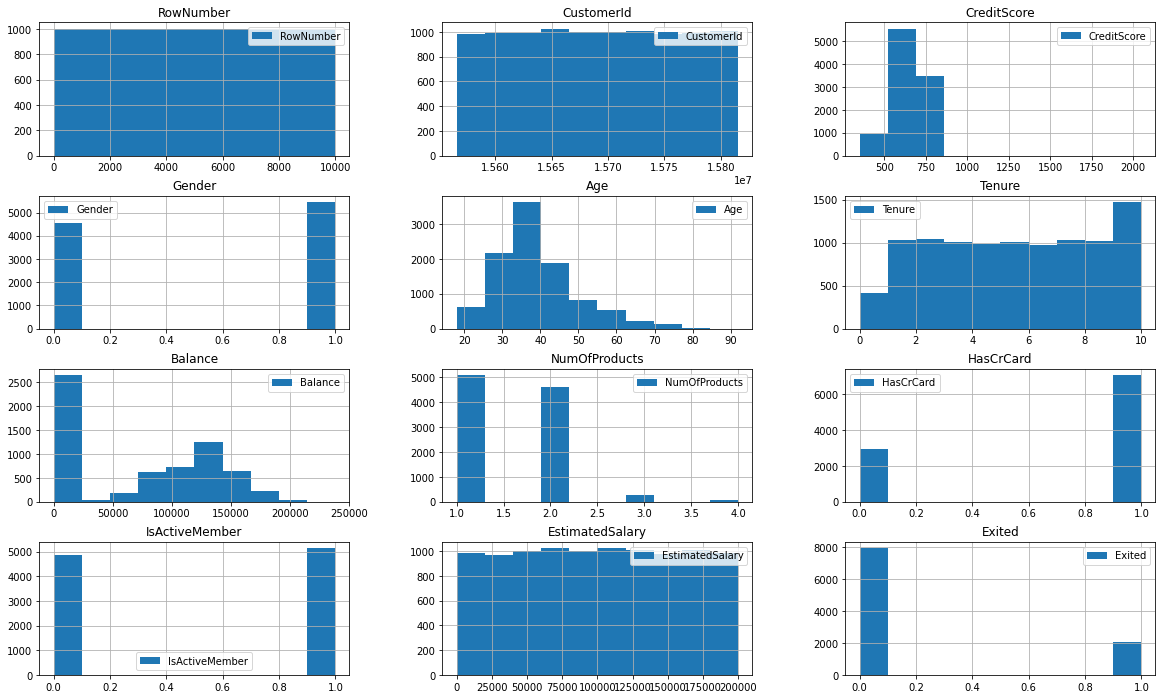

In [9]:
data.hist(figsize=(20,12),legend=True)

In [10]:
data.drop(columns=["RowNumber","CustomerId"],inplace=True)
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,0,42,2,NaN,1,1,1,101348.88,1
1,Hill,608,Spain,0,41,1,8387.86,1,0,1,112542.58,0
2,Onio,502,France,0,42,8,15966.80,3,1,0,113931.57,1
3,Boni,699,France,0,39,1,NaN,2,0,0,93826.63,0
4,Mitchell,850,Spain,0,43,2,12551.82,1,1,1,79084.10,0


In [11]:
data["Surname"].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [12]:
data.duplicated().value_counts()

False    10000
dtype: int64

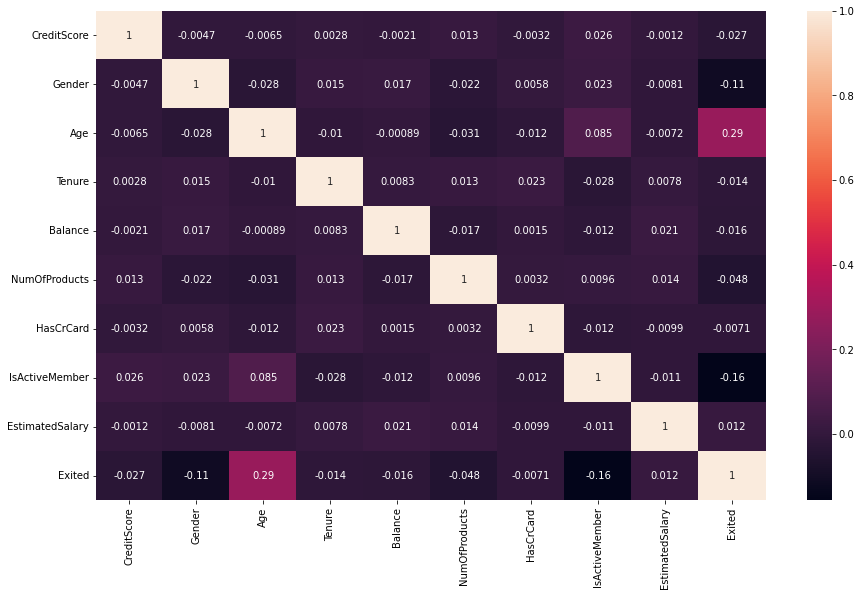

In [13]:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True)

In [14]:
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.862500,0.545700,38.921800,5.012800,75345.698833,1.530200,0.70550,0.515100,100090.239881,0.203700
std,97.968276,0.497932,10.487806,2.892174,59818.076920,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,12.170000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,12964.305000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,85225.210000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,128357.590000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,2050.000000,1.000000,92.000000,10.000000,238387.560000,4.000000,1.00000,1.000000,199992.480000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


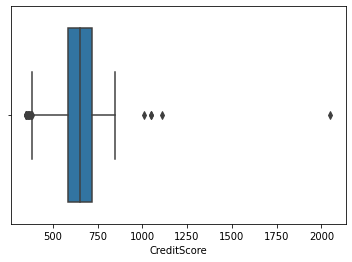

In [15]:
sns.boxplot(data["CreditScore"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


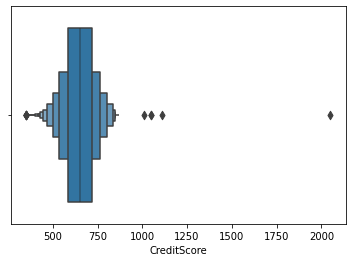

In [16]:
sns.boxenplot(data.CreditScore)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


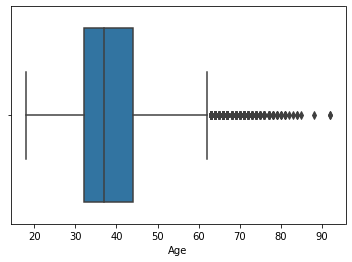

In [17]:
sns.boxplot(data["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


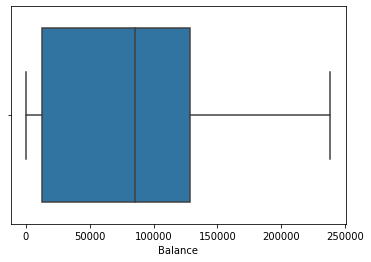

In [18]:
sns.boxplot(data["Balance"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


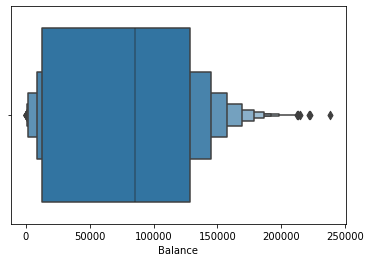

In [19]:
sns.boxenplot(data.Balance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


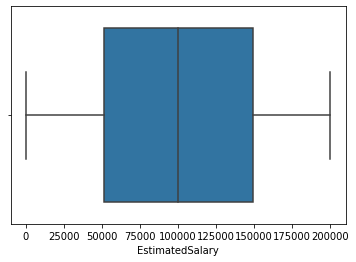

In [20]:
sns.boxplot(data.EstimatedSalary)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


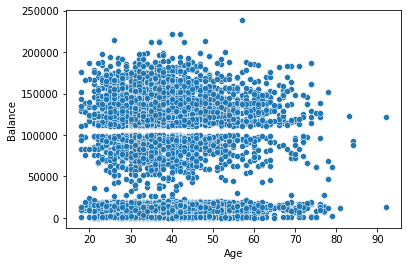

In [21]:
sns.scatterplot(data.Age,data.Balance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


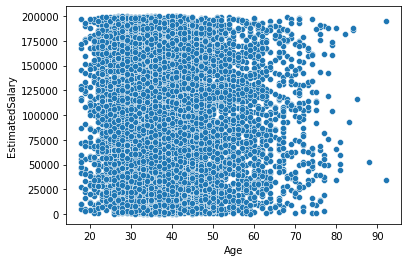

In [22]:
sns.scatterplot(data.Age,data.EstimatedSalary)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


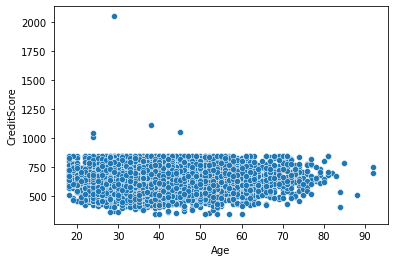

In [23]:
sns.scatterplot(data.Age,data.CreditScore)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


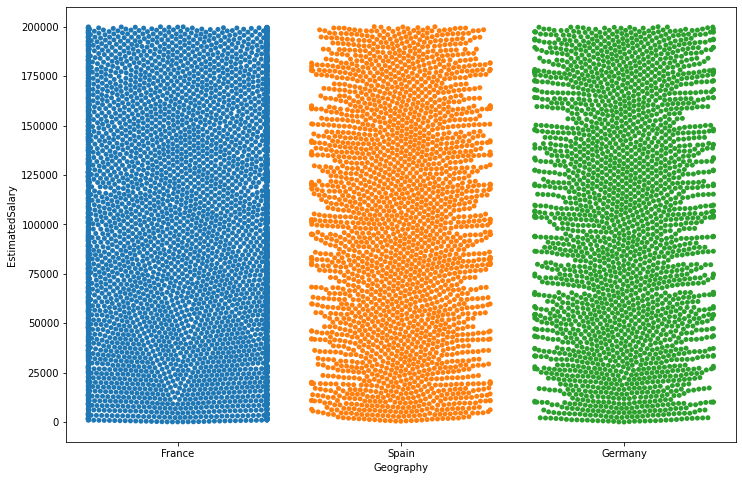

In [24]:
plt.figure(figsize=(12,8))
sns.swarmplot(data.Geography,data.EstimatedSalary,data=data)

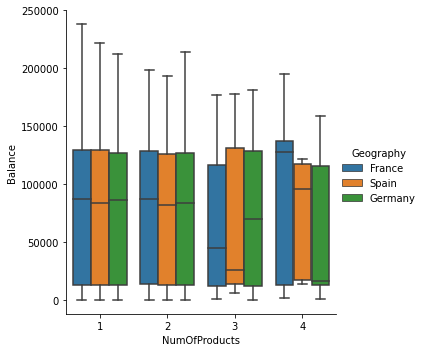

In [25]:
sns.catplot(x="NumOfProducts",y="Balance",data=data,hue="Geography",kind='box')

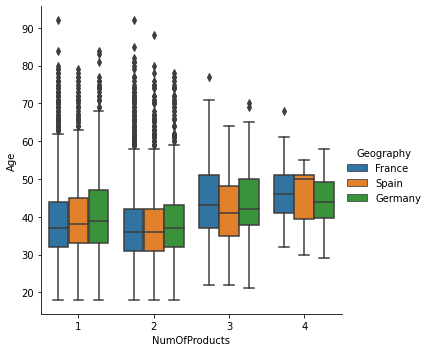

In [26]:
sns.catplot(x="NumOfProducts",y="Age",data=data,hue="Geography",kind='box')

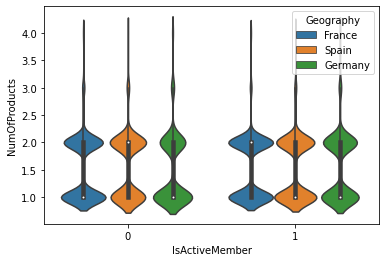

In [27]:
sns.violinplot(x="IsActiveMember",y="NumOfProducts",data=data,hue="Geography")

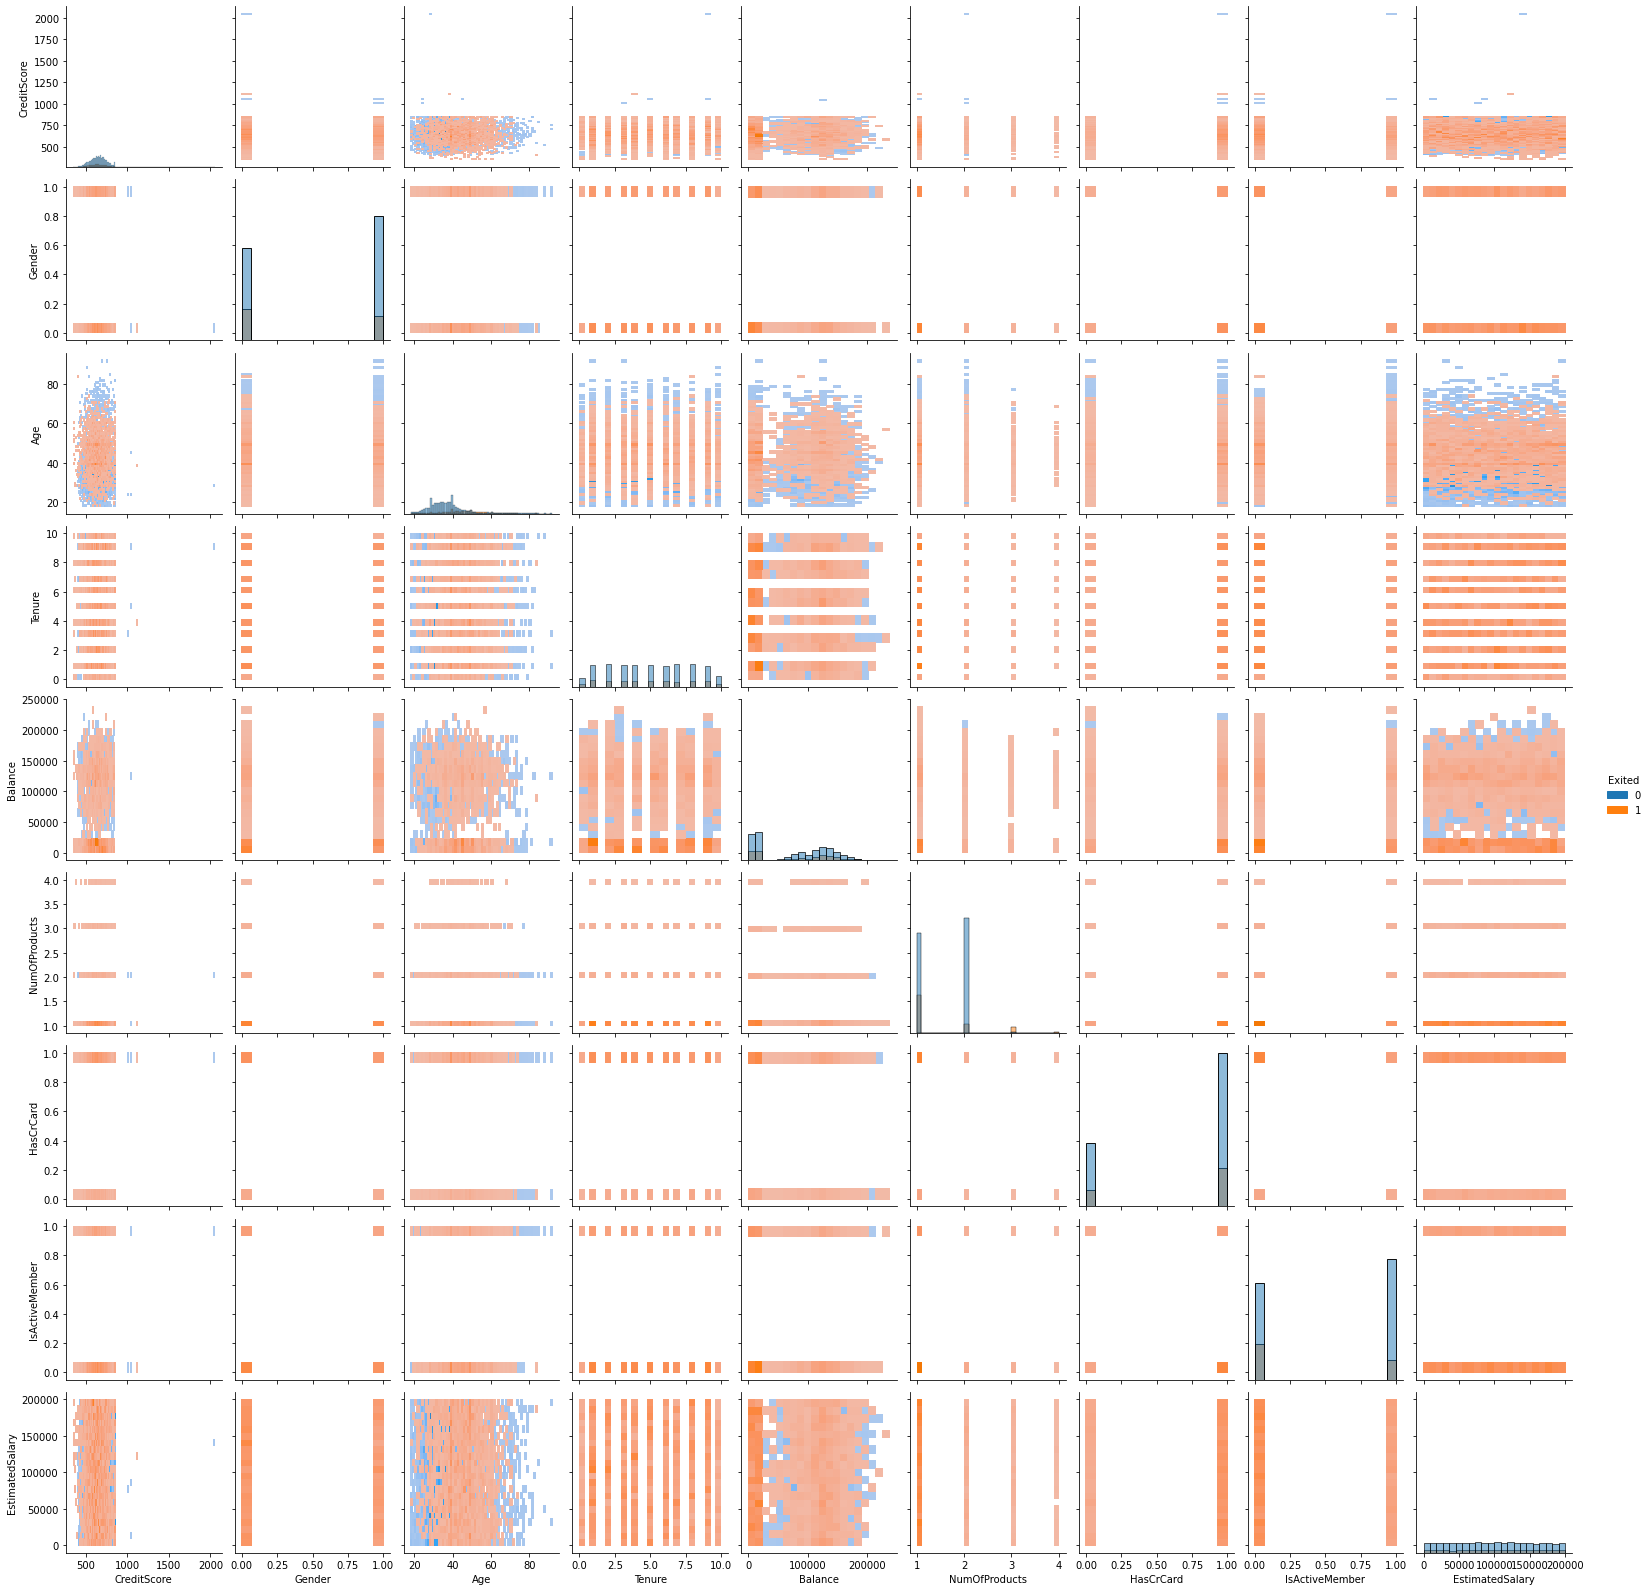

In [28]:
sns.pairplot(data=data,hue="Exited",kind='hist')

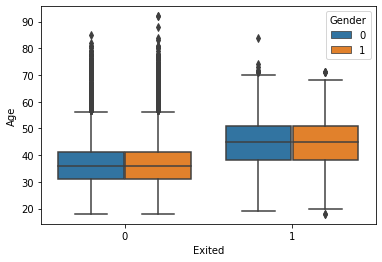

In [29]:
sns.boxplot(x="Exited",y="Age",data=data,hue="Gender")

In [30]:
q1=data["Age"].quantile(0.25)
q3=data["Age"].quantile(0.75)
iq=q3-q1
data=data[~((data["Age"]<(q1-1.5*iq))|(data["Age"]>(q3+1.5*iq)))]

In [31]:
q1=data["CreditScore"].quantile(0.25)
q3=data["CreditScore"].quantile(0.75)
iq=q3-q1
data=data[~((data["CreditScore"]<(q1-1.5*iq))|(data["CreditScore"]>(q3+1.5*iq)))]

In [32]:
data[(data["Age"]<(data["Age"].mean()-3*data["Age"].std()))|(data["Age"]>(data["Age"].mean()+3*data["Age"].std()))]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [33]:
geo=pd.get_dummies(data["Geography"],drop_first=True)
data1=pd.concat([data,geo],axis=1)
data1

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,Hargrave,619,France,0,42,2,NaN,1,1,1,101348.88,1,0,0
1,Hill,608,Spain,0,41,1,8387.86,1,0,1,112542.58,0,0,1
2,Onio,502,France,0,42,8,15966.80,3,1,0,113931.57,1,0,0
3,Boni,699,France,0,39,1,NaN,2,0,0,93826.63,0,0,0
4,Mitchell,850,Spain,0,43,2,12551.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,1,39,5,NaN,2,1,0,96270.64,0,0,0
9996,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,Liu,709,France,0,36,7,NaN,1,0,1,42085.58,1,0,0
9998,Sabbatini,772,Germany,1,42,3,7575.31,2,1,0,92888.52,1,1,0


In [34]:
x=data1.drop(columns=["Geography","Exited"])
y=data["Exited"]
x.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,Hargrave,619,0,42,2,NaN,1,1,1,101348.88,0,0
1,Hill,608,0,41,1,8387.86,1,0,1,112542.58,0,1
2,Onio,502,0,42,8,15966.80,3,1,0,113931.57,0,0
3,Boni,699,0,39,1,NaN,2,0,0,93826.63,0,0
4,Mitchell,850,0,43,2,12551.82,1,1,1,79084.10,0,1


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
scaled_data=sc.fit_transform(x)
scaled_data=pd.DataFrame(scaled_data,columns=["CreditScore","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Germany","Spain"])
scaled_data.head()

ValueError: ignored

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [38]:
x_train.shape,x_test.shape

((7696, 12), (1924, 12))